## Exercise 05 : Boxplot ##

## Imports ##

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Task #
Помните, как мы пытались выяснить, влияет ли новостная лента на поведение тестовой и контрольной групп? В прошлый раз мы просто вычисляли средние значения. Но знаем ли мы что‑то о дисперсиях? А что если они тоже изменились? Или если были выбросы?

Для ответа на эти вопросы может быть полезно построить боксплот.

Сделайте всё необходимое, чтобы создать график, похожий на Reaadme.

* используйте данные из файла, прочитайте их в DataFrame и при необходимости внесите любые изменения, которые помогут решить задачу
* размер фигуры (figsize) оставить прежним, размер шрифта можно выбрать любой
* цветовая палитра должна соответствовать примеру
* размер шрифта заголовка — 15
* толщина линий ящика — 3, толщина линии медианы — 2
* в конце Jupyter Notebook создайте markdown‑ячейку и вставьте вопрос:
  «Каков был межквартильный размах (IQR) контрольной группы до новостной ленты?»
  В ответе укажите приблизительное значение, которое можно получить, просто взглянув на график, округлённое до ближайших 10

In [2]:
df = pd.read_csv('../data/ab-test.csv')
df.head()

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test


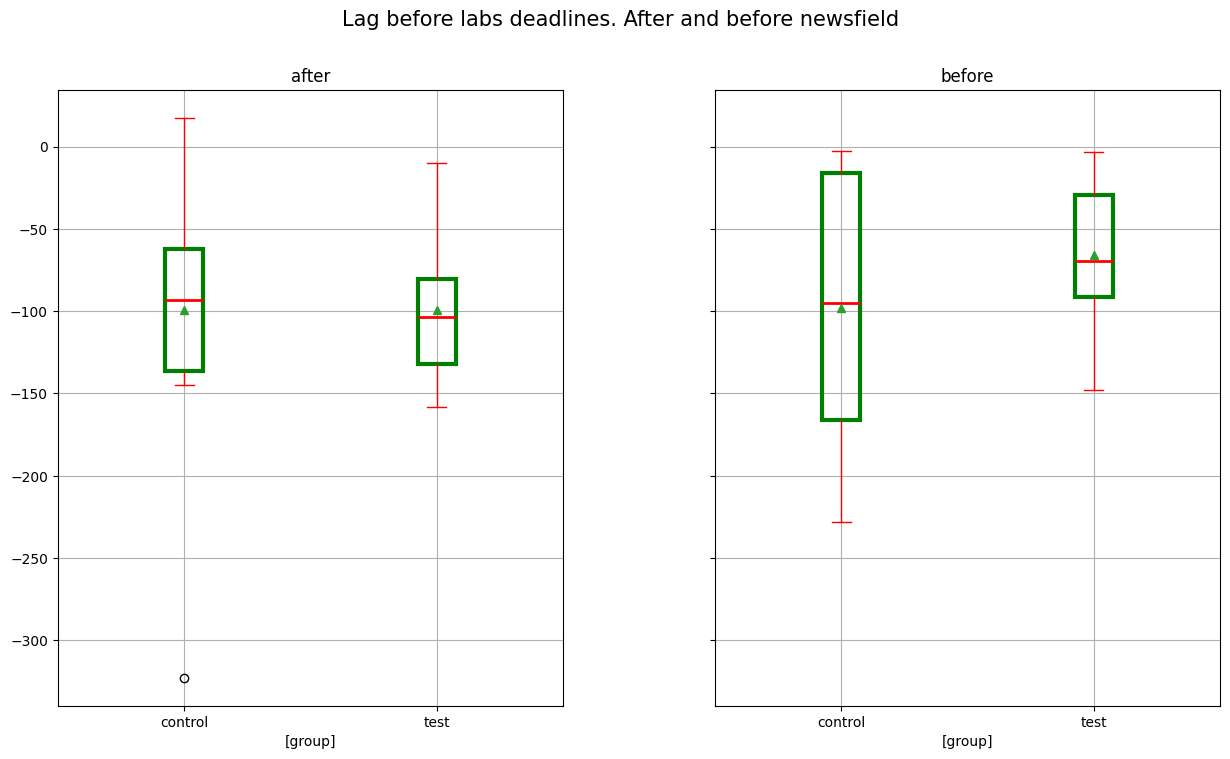

In [3]:
# # Предположим, ваш DataFrame называется df
# # Разделим данные
test_before = df[(df['group'] == 'test') & (df['time'] == 'before')]['diff']
test_after = df[(df['group'] == 'test') & (df['time'] == 'after')]['diff']
control_before = df[(df['group'] == 'control') & (df['time'] == 'before')]['diff']
control_after = df[(df['group'] == 'control') & (df['time'] == 'after')]['diff']

fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)  # общий Y

data_after = [control_after, test_after]
data_before = [control_before, test_before]

positions = [1, 2]
positions2 = [4, 5]

# Стиль боксплотов
boxprops = dict(facecolor='none', edgecolor='green', linewidth=3)
capprops = dict(color='red', linewidth=1)
whiskerprops = dict(color='red', linewidth=1)
medianprops = dict(color='red', linewidth=2)
flierprops = dict(marker='o', markerfacecolor='none', markeredgecolor='black', markersize=6)

# Построение для 'after' (левая часть)
axes[0].boxplot(
    data_after,
    positions=positions,
    patch_artist=True,
    boxprops=boxprops,
    capprops=capprops,
    whiskerprops=whiskerprops,
    medianprops=medianprops,
    flierprops=flierprops,
    showmeans=True
)
axes[0].set_title('after', fontsize=12, weight='normal')

# Построение для 'before' (правая часть)
axes[1].boxplot(
    data_before,
    positions=positions2,
    patch_artist=True,
    boxprops=boxprops,
    capprops=capprops,
    whiskerprops=whiskerprops,
    medianprops=medianprops,
    flierprops=flierprops,
    showmeans=True
)
axes[1].set_title('before', fontsize=12, weight='normal')

axes[0].set_xticks([1, 2])
axes[0].set_xticklabels(['control', 'test'])
axes[1].set_xticks([4, 5])
axes[1].set_xticklabels(['control', 'test'])
axes[0].set_xlabel('[group]')
axes[1].set_xlabel('[group]')
axes[0].tick_params(axis='x', labelrotation=0)
axes[1].tick_params(axis='x', labelrotation=0)

for ax in axes:
    ax.grid(True)

plt.suptitle('Lag before labs deadlines. After and before newsfield', fontsize=15)

plt.subplots_adjust(wspace=0.3)

plt.show()

Каков был межквартильный размах (IQR) контрольной группы до новостной ленты?

Ну примерно от -20 до -170, т.е. 150